In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale

In [2]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')



In [3]:
mediaChance = data_frame['Chance of Admit '].mean()

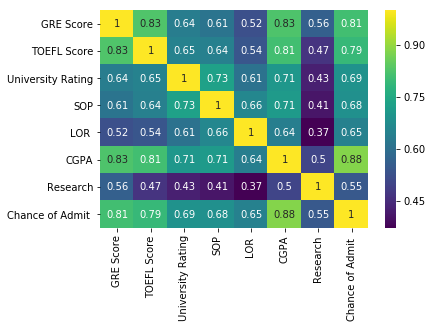

In [4]:
sns.heatmap(data_frame.drop(axis=1, columns=['Serial No.']).corr(), annot=True, cmap='viridis')

In [5]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['University Rating'] = data_frame['University Rating'] / data_frame['University Rating'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [6]:
knn = KNeighborsClassifier()

In [7]:
data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,0.8,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,0.8,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,0.6,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,0.6,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,0.4,0.4,0.6,0.827621,0,0.0


In [8]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ', 'University Rating']]
y = data_frame['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
print("Acurácia de teste KNN: ", knn.score(x_test, y_test))

Acurácia de teste KNN:  0.848
